内存模型和内存结构, 两个概念真是容易弄混, 关于内存模型维基上给的定义是讲多个线程间通过共享数据内存区的交互, 而内存结构说的应该就是JVM的运行时数据区吧 Runtime data area.

**Native methods** are Java methods that start in a language other than Java. Native methods can access system-specific functions and APIs that are not available directly in Java.

Field 就是类的私有成员, variable, property. 

---

Native methods are Java™ methods that start in a language other than Java. Native methods can access system-specific functions and APIs that are not available directly in Java.

The use of native methods limits the portability of an application, because it involves system-specific code. Native methods can either be new native code statements or native code statements that call existing native code.

Once you decide that a native method is required, it may have to interoperate with the Java virtual machine where it runs. The Java Native Interface (JNI) facilitates this interoperability in a platform-neutral way.

The JNI is a set of interfaces that permit a native method to interoperate with the Java virtual machine in numerous ways. For example, the JNI includes interfaces that create new objects and call methods, get fields and set fields, process exceptions, and manipulate strings and arrays.

https://www.ibm.com/docs/en/i/7.2?topic=languages-native-methods-java-native-interface

# JVM内存结构 Runtime Data Area
---

先说简单的内存结构. 

The JVM divides its memory into two main categories: heap memory and non-heap memory. It’s where objects that are created by the application are stored. They remain there until they are no longer referenced and are garbage collected. 

细节请参考: https://docs.oracle.com/javase/specs/jvms/se8/html/jvms-2.html#jvms-2.5

#### 1) Heap(Shared among Threads, JVM启动的时候创建)
The heap is the run-time data area from which memory for all class instances and arrays is allocated.
下面这就是数组对象, 其它的对象比如hashmap, list都是类, 类的实例当然也是存储在heap上. 
```java
int arr[] = new int[5];
```
#### 2) Method Area(Shared among Threads, JVM启动的时候创建)
类似C的文本字段区, 说白了就是存储代码的, 在这存储的是字节码, JVM主要靠这个来执行程序, 知道下一步要干啥, 所有线程都可访问, 毕竟每个线程需要知道自己接下来要干嘛.

Method area stores **class level** data (including static variables) such as:

- Classloader reference
- Run time constant pool — Numeric constants, field references, method references, attributes; As well as the constants of each class and interface, it contains all references for methods and fields. When a method or field is referred to, the JVM searches the actual address of the method or field on the memory by using the runtime constant pool.
- Field data — Per field: name, type, modifiers, attributes
- Method data — Per method: name, return type, parameter types (in order), modifiers, attributes
- Method code — Per method: bytecodes, operand stack size, local variable size, local variable table, exception table; - Per exception handler in exception table: start point, end point, PC offset for handler code, constant pool index for exception class being caught

#### 3) PC Register(per Thread, 线程被创建时创建)
Each Java Virtual Machine thread has its own pc (program counter) register. 

#### 4) Stack Area(per Thread, 线程被创建时创建)
在方法调用时，创建一个叫栈帧的数据结构，用于存储局部变量和部分过程的结果，栈帧由以下几部分组成：

局部变量表：存储方法调用时传递的参数，从0开始存储this、方法参数、局部变量

操作数栈：执行中间操作，存储从局部变量表或对象实例字段复制的常量或变量值，以及操作结果，另外，还用来准备被调用方法的参数和接受方法调用的返回结果

动态链接：一个指向运行时常量池的引用，将 class 文件中的符号引用（描述一个方法调用了其他方法或访问成员变量）转为直接引用

方法返回地址：方法正常退出或抛出异常退出，返回方法被调用的位置

#### 5) Native Method Stacks(per Thread)
与 JVM 栈类似，只不过服务于 Native 方法

An implementation of the Java Virtual Machine may use conventional stacks, colloquially called "C stacks," to support native methods (methods written in a language other than the Java programming language). Native method stacks may also be used by the implementation of an interpreter for the Java Virtual Machine's instruction set in a language such as C. Java Virtual Machine implementations that cannot load native methods and that do not themselves rely on conventional stacks need not supply native method stacks. If supplied, native method stacks are typically allocated per thread when each thread is created.

#### 补充一下上面的Run-Time Constant Pool (属于method area)
存储类或接口中的数值字面量，字符串字面量以及所有方法或字段的引用，基本上涉及到方法或字段，JVM 就会在运行时常量池中搜索其具体的内存地址

It contains several kinds of constants, ranging from numeric literals known at compile-time to method and field references that must be resolved at run-time. The run-time constant pool serves a function similar to that of a symbol table for a conventional programming language, although it contains a wider range of data than a typical symbol table.

所以运行时长量池, 不仅存储一些数字字符串常量, 还存储类的field, method的地址, runtime的时候, JVM要到这个区域检索信息. 

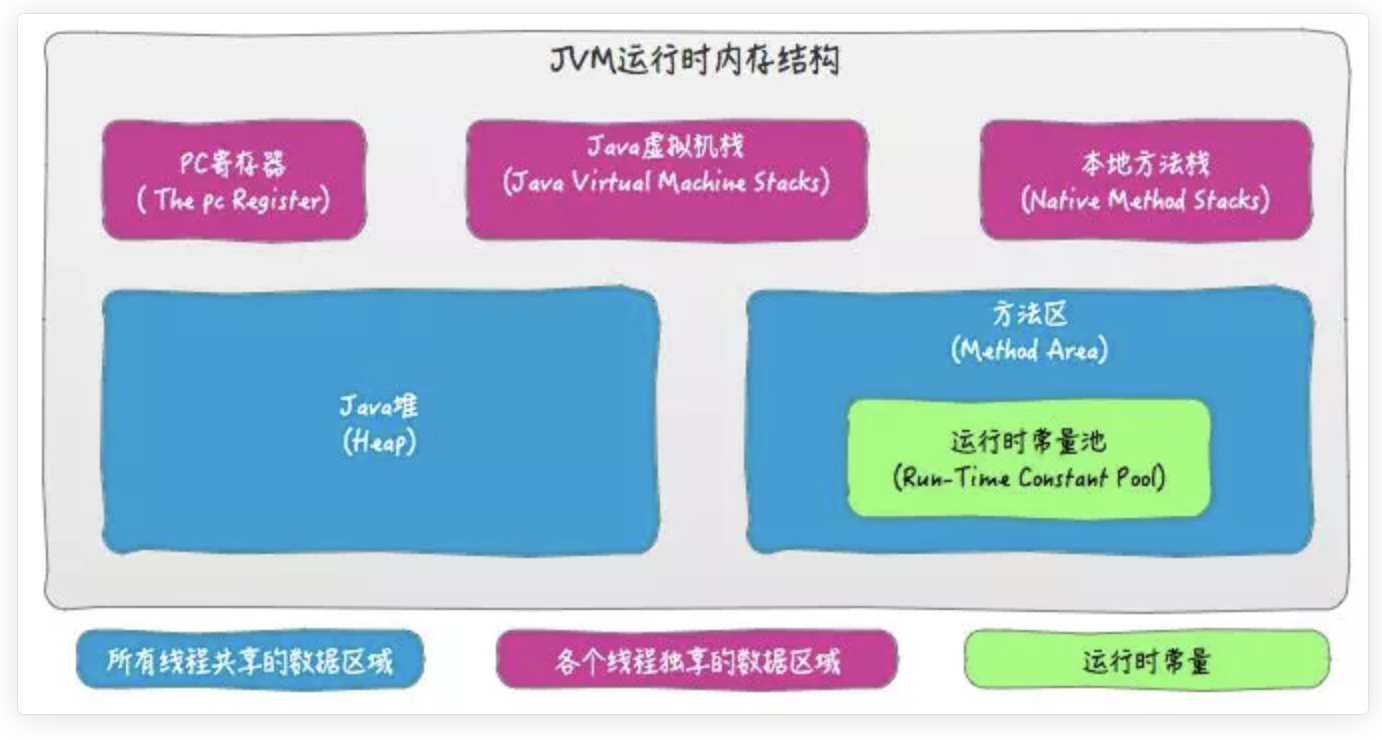

在前面的JVM内存结构图中，我们可以看到Java堆和方法区的区域是多个线程共享的数据区域。

Java内存模型规定了所有的变量都存储在主内存中，**每个线程还有自己的工作内存**，线程的工作内存中保存了该线程中是用到的变量的主内存副本拷贝，线程对变量的所有操作都必须在工作内存中进行，而不能直接读写主内存。不同的线程之间也无法直接访问对方工作内存中的变量，线程间变量的传递均需要自己的工作内存和主存之间进行数据同步进行。

而JMM就作用于工作内存和主存之间数据同步过程。他规定了如何做数据同步以及什么时候做数据同步。

---

上面说的java的每个线程都有自己的工作内存, 就很像CPU 缓存 主存的关系, 多核心CPU的每个核心都有自己的缓存, 缓存保存的就是主存中数据的拷贝. 因为CPU和主存速度的差异, 所以缓存, 寄存器用来作为缓冲, 临时存储数据供CPU使用. 当程序在运行过程中，会将运算需要的数据从主存复制一份到CPU的高速缓存当中，那么CPU进行计算时就可以直接从它的高速缓存读取数据和向其中写入数据，当运算结束之后，再将高速缓存中的数据刷新到主存当中(和上面java的线程很像吧(工作内存和主存).  应该说java线程的内存模型就是按照物理缓存的缺点来设计的)。